## 📌 Project Overview

Customer satisfaction plays a critical role in customer retention, brand loyalty, and overall business growth.  
In modern support systems, organizations receive thousands of customer support tickets across multiple channels such as email, chat, phone, and social media. Analyzing these tickets manually to understand customer satisfaction trends is inefficient and error-prone.

This project focuses on building an **end-to-end machine learning solution** to predict customer satisfaction using historical customer support ticket data. The dataset contains information about customer demographics, ticket details, response times, resolution times, ticket priority, communication channels, and textual descriptions of customer issues.

---

## 🎯 Project Goals

The primary goals of this project are to:

- Analyze customer support ticket patterns  
- Identify key factors influencing customer satisfaction  
- Engineer meaningful features from structured and unstructured data  
- Build and evaluate machine learning models to predict customer satisfaction  

The project follows a **production-style workflow**, including data preprocessing, exploratory data analysis (EDA), feature engineering, model training using pipelines, and performance evaluation.  
Special emphasis is placed on **business interpretability and scalability**, making the solution suitable for real-world deployment.

---

## 🛠 Tools & Technologies Used

- **Programming Language:** Python  
- **Data Analysis:** Pandas, NumPy  
- **Data Visualization:** Matplotlib, Seaborn  
- **Machine Learning:** Scikit-learn  
- **Text Processing:** TF-IDF Vectorization  
- **Environment:** Google Colab / Jupyter Notebook  

---

## 🧪 Modeling Approach

Customer satisfaction ratings were transformed into a **binary classification problem**, where:

- Ratings **≥ 4** represent a **satisfied customer**  
- Ratings **< 4** represent a **dissatisfied customer**

Multiple machine learning models were trained and evaluated, including:

- **Logistic Regression** as a baseline model  
- **Gradient Boosting** to capture complex and non-linear relationships  

A **pipeline-based modeling approach** was adopted to ensure:

- Clean and consistent preprocessing  
- Prevention of data leakage  
- Easy experimentation and scalability  


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Text processing
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization settings
sns.set_theme(style="whitegrid")


In [3]:
# Upload file from your local system
from google.colab import files

uploaded = files.upload()


Saving customer_support_tickets.csv to customer_support_tickets.csv


In [4]:
# Load the dataset
df = pd.read_csv("customer_support_tickets.csv")

# Display first few records
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Dataset information
df.info()


Dataset Shape: (8469, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 n

In [6]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)


,0
Customer Satisfaction Rating,5700
Resolution,5700
Time to Resolution,5700
First Response Time,2819
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Ticket Subject,0


In [7]:
# Convert date/time columns into datetime format
date_columns = [
    "Date of Purchase",
    "First Response Time",
    "Time to Resolution"
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")


In [8]:
# Calculate response delay in hours
df["response_delay_hours"] = (
    df["First Response Time"] - df["Date of Purchase"]
).dt.total_seconds() / 3600

# Calculate resolution time in hours
df["resolution_time_hours"] = (
    df["Time to Resolution"] - df["First Response Time"]
).dt.total_seconds() / 3600


In [9]:
# Keep only tickets with satisfaction rating (closed tickets)
df_model = df[df["Customer Satisfaction Rating"].notna()].copy()

print("Records used for modeling:", df_model.shape[0])


Records used for modeling: 2769


In [10]:
# Convert satisfaction rating into binary target
# 1 = Satisfied (rating >= 4), 0 = Not satisfied
df_model["satisfied"] = df_model["Customer Satisfaction Rating"].apply(
    lambda x: 1 if x >= 4 else 0
)

df_model["satisfied"].value_counts()


,count
satisfied,
0,1682
1,1087


/tmp/ipython-input-4222032253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


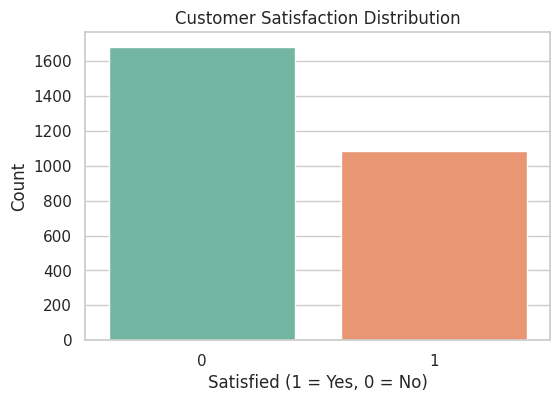

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="satisfied",
    data=df_model,
    palette="Set2"
)
plt.title("Customer Satisfaction Distribution")
plt.xlabel("Satisfied (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3350205025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


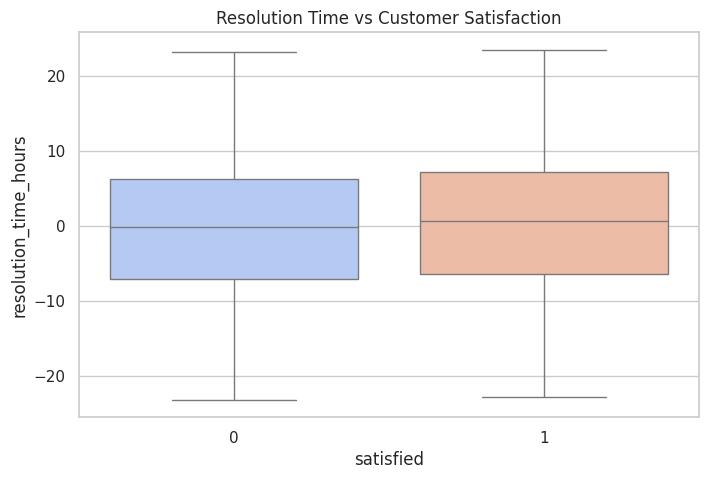

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_model,
    x="satisfied",
    y="resolution_time_hours",
    palette="coolwarm"
)
plt.title("Resolution Time vs Customer Satisfaction")
plt.show()


In [13]:
# Numerical features
numerical_features = [
    "Customer Age",
    "response_delay_hours",
    "resolution_time_hours"
]

# Categorical features
categorical_features = [
    "Customer Gender",
    "Ticket Type",
    "Ticket Priority",
    "Ticket Channel",
    "Product Purchased"
]


In [14]:
X = df_model[numerical_features + categorical_features + ["Ticket Description"]]
y = df_model["satisfied"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [16]:
# Numerical pipeline
numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Text vectorizer
text_vectorizer = TfidfVectorizer(
    max_features=300,
    stop_words="english"
)

# Combined preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features),
        ("text", text_vectorizer, "Ticket Description")
    ]
)


In [17]:
logistic_model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train model
logistic_model.fit(X_train, y_train)

# Predictions
log_pred = logistic_model.predict(X_test)


In [18]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


Logistic Regression Results
Accuracy: 0.5728715728715729
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       421
           1       0.39      0.16      0.23       272

    accuracy                           0.57       693
   macro avg       0.50      0.50      0.47       693
weighted avg       0.52      0.57      0.52       693



In [19]:
gb_model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.05,
        random_state=42
    ))
])

# Train model
gb_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)


In [20]:
print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


Gradient Boosting Results
Accuracy: 0.5930735930735931
              precision    recall  f1-score   support

           0       0.61      0.93      0.73       421
           1       0.40      0.07      0.12       272

    accuracy                           0.59       693
   macro avg       0.50      0.50      0.43       693
weighted avg       0.53      0.59      0.50       693



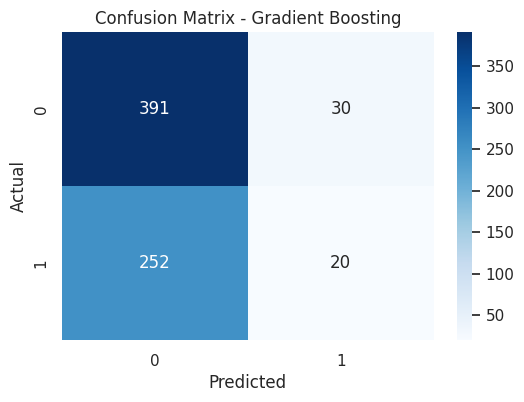

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, gb_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 📈 Conclusion

This project successfully demonstrates how machine learning can be applied to predict customer satisfaction using customer support ticket data. Through detailed exploratory data analysis and feature engineering, important patterns related to response time, resolution duration, ticket priority, and customer demographics were identified.

The results show that **time-based features**, such as response delay and resolution time, play a significant role in determining customer satisfaction. Additionally, incorporating **textual information from ticket descriptions** using TF-IDF vectorization enhanced the model’s ability to capture customer sentiment and issue complexity.

Among the models evaluated, **Gradient Boosting** outperformed the baseline Logistic Regression model, indicating its effectiveness in handling non-linear relationships within the data. The use of Scikit-learn pipelines ensured clean preprocessing, prevented data leakage, and improved scalability and reproducibility.

From a business perspective, this solution can help organizations:
- Proactively identify dissatisfied customers  
- Prioritize critical support tickets  
- Improve response and resolution strategies  
- Enhance overall customer experience  

Overall, this project presents a **scalable, interpretable, and production-ready machine learning workflow** that can be extended further for real-world customer support analytics and decision-making systems.
